                                      Avocado Project

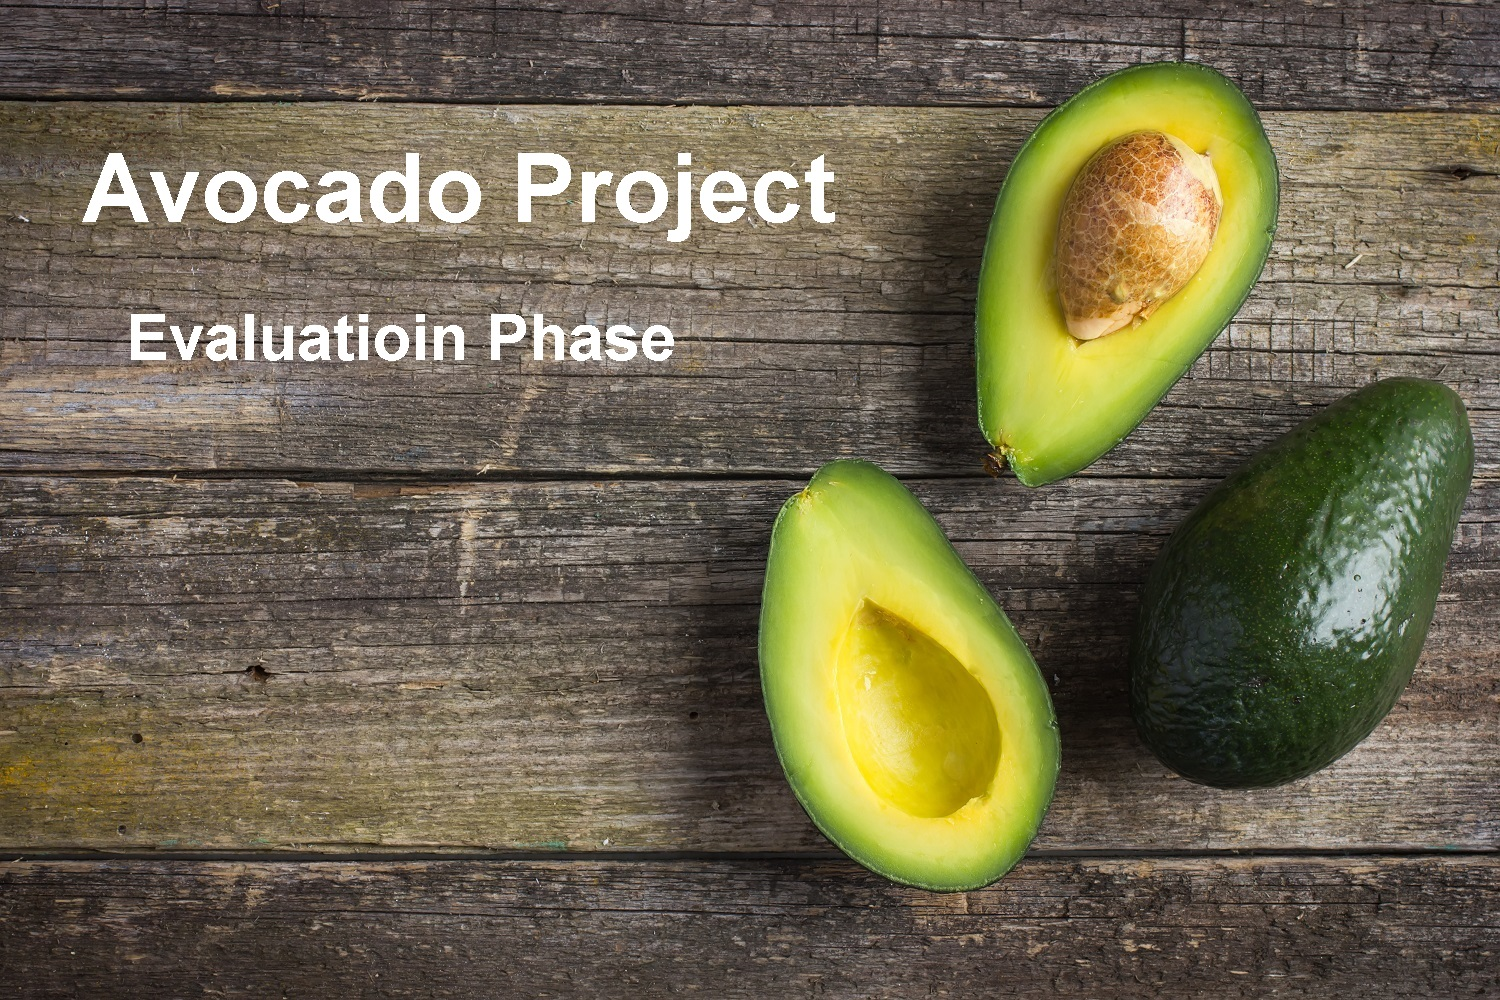

Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


Importing  the required libraries.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, accuracy_score,classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

Uploading the data set.


In [3]:
av=pd.read_csv("avocado.csv")

Lets check the first five rows in our data set.

In [72]:
av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Lets check the last five rows in our data set.

In [73]:
av.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


Lets check the shape of data.

In [5]:
av.shape

(18249, 14)

Deleting the Unnamed Column from the data as it is not required.

In [20]:
av.drop('Unnamed: 0',axis=1, inplace=True)

In [21]:
av.drop('Date',axis=1, inplace=True)

Checking the unique values in the data.

In [21]:
av.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [13]:
av['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [8]:
av['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [75]:
av.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16338,2017-11-12,1.80,19234.13,5.12,317.19,0.00,18911.82,18525.27,386.55,0.0,organic,2017,NorthernNewEngland
10042,2015-05-17,2.30,3485.39,46.31,2854.86,2.61,581.61,581.61,0.00,0.0,organic,2015,HartfordSpringfield
2834,2016-06-26,1.50,133086.66,7923.01,106656.84,37.42,18469.39,16479.75,419.64,1570.0,conventional,2016,Albany
17756,2018-01-07,1.38,39706.28,8896.86,939.38,22.09,29847.95,28597.18,1250.77,0.0,organic,2018,Denver
4611,2016-04-24,1.02,109421.34,1300.85,52354.40,1239.89,54526.20,42500.07,12026.13,0.0,conventional,2016,Pittsburgh


In [22]:
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
dtypes: float64(9), int32(2), int64(1)
memory usage: 1.5 MB


No missing values.
Region and type are object type data. Date is also object type data, it has all dates type data.
Remaining columns are numerical type data mainly all have the floating data type.

Checking the duplicate value.

In [22]:
av.duplicated().sum()

0

No duplicate value in our data.

Checking the value counts in categorical columns

In [18]:
av['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

All "Region" has 338 observations except "WestTexNewMexico" has 335 observations.

In [19]:
av['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [20]:
av['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

Checking the correlation in the data set.

In [23]:
av.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [ ]:
Lets check the Descriptive Statistics

In [21]:
av.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Data Visualisation

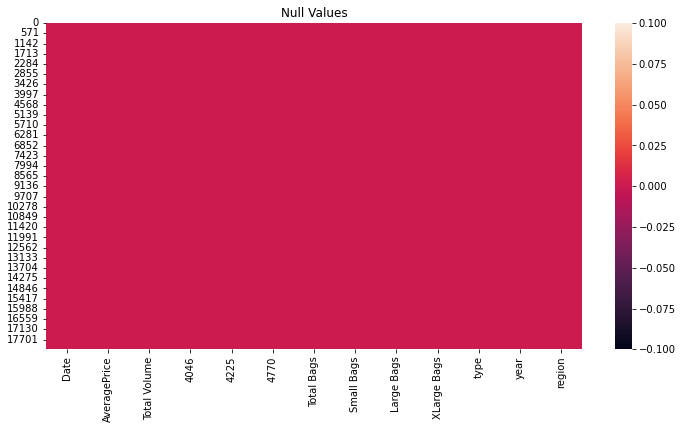

In [24]:
plt.figure(figsize=[12,6])
sns.heatmap(av.isnull())
plt.title("Null Values")
plt.show()

No null values in data set.


Bivariate analysis


Bivariate analysis between average price and type.

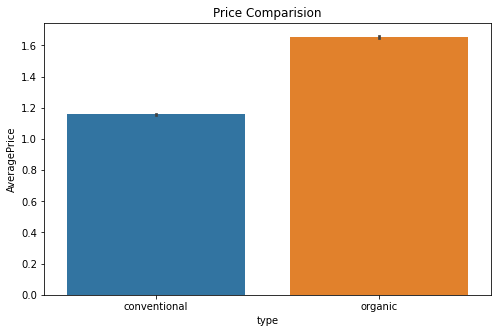

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x='type', y='AveragePrice', data=av)
plt.title('Price Comparision')
plt.show()

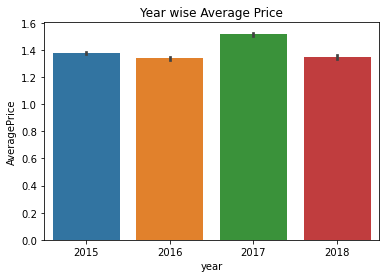

In [6]:
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='AveragePrice', data=av)
plt.title('Year wise Average Price')
plt.show()

In 2017 there is increase in price.

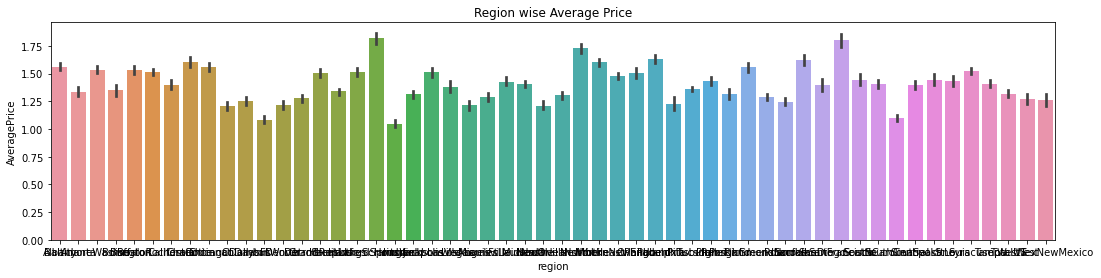

In [10]:
plt.figure(figsize=(18,4))
sns.barplot(x='region',y='AveragePrice', data=av)
plt.title('Region wise Average Price')
plt.show()

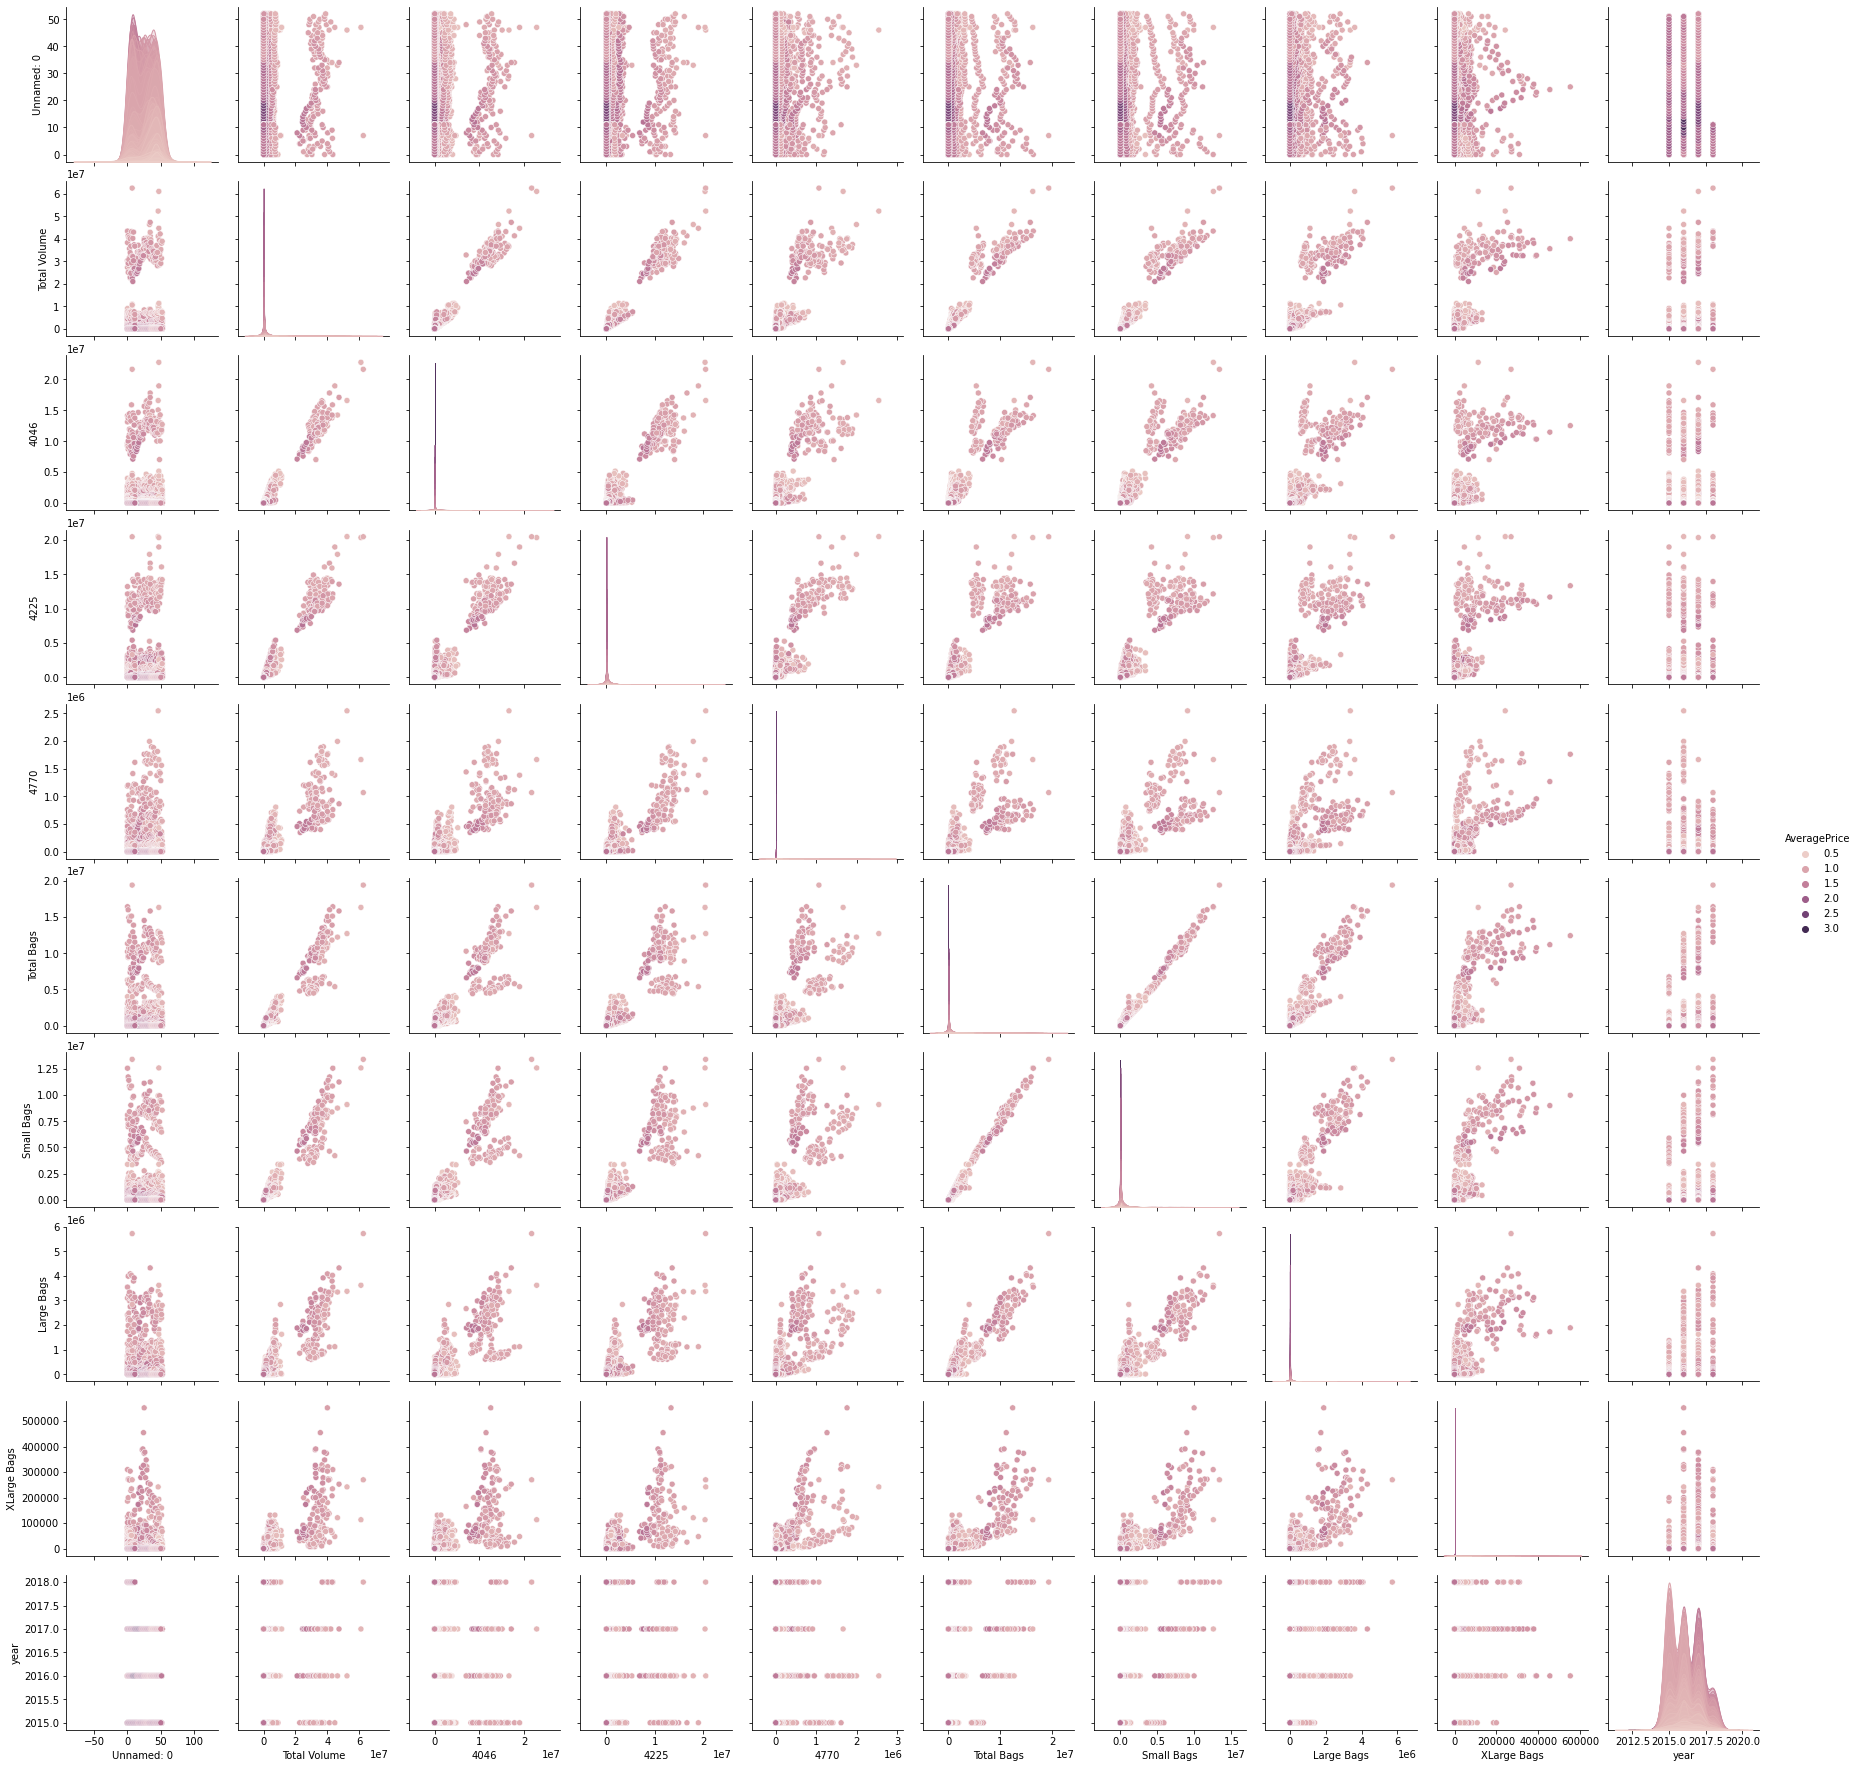

In [13]:
sns.pairplot(data=av,hue="AveragePrice")

Exploration of target variable

In [23]:
av.AveragePrice.min()

0.44

In [24]:
av.AveragePrice.max()

3.25

In [25]:
av.AveragePrice.mean()

1.4059784097758825

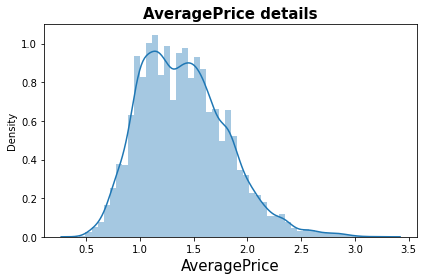

In [26]:
sns.distplot(av.AveragePrice)
plt. title('AveragePrice details',fontsize= 15, fontweight='bold')

plt. xlabel('AveragePrice', fontsize= 15)
plt.tight_layout()
plt.show()

Our Target Varible "Avergage Price" has right skewed data.

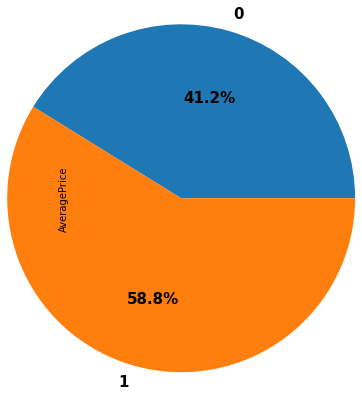

In [27]:
av.groupby('type')['AveragePrice'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

<AxesSubplot:>

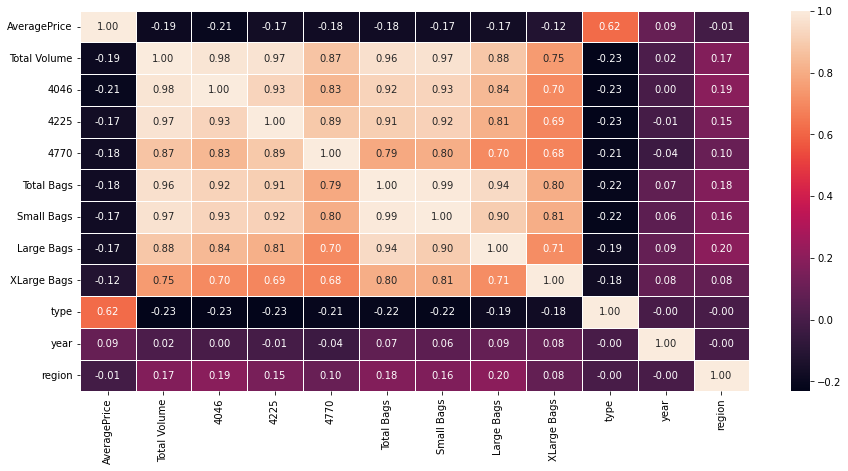

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(av.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

Label Encoding

In [29]:
encoder=LabelEncoder()

In [30]:
av["type"] = encoder.fit_transform(av[["type"]])
av["region"] =encoder.fit_transform(av[["region"]])

Checking both categorical column unique value after transformation

In [31]:
av["type"].unique()

array([0, 1], dtype=int64)

In [32]:
av["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

In [33]:
av.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [34]:
av.shape

(18249, 12)

In [35]:
av.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

AveragePrice       AxesSubplot(0.125,0.657941;0.133621x0.222059)
Total Volume    AxesSubplot(0.285345,0.657941;0.133621x0.222059)
4046             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
4225            AxesSubplot(0.606034,0.657941;0.133621x0.222059)
4770            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Total Bags         AxesSubplot(0.125,0.391471;0.133621x0.222059)
Small Bags      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Large Bags       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
XLarge Bags     AxesSubplot(0.606034,0.391471;0.133621x0.222059)
type            AxesSubplot(0.766379,0.391471;0.133621x0.222059)
year                  AxesSubplot(0.125,0.125;0.133621x0.222059)
region             AxesSubplot(0.285345,0.125;0.133621x0.222059)
dtype: object

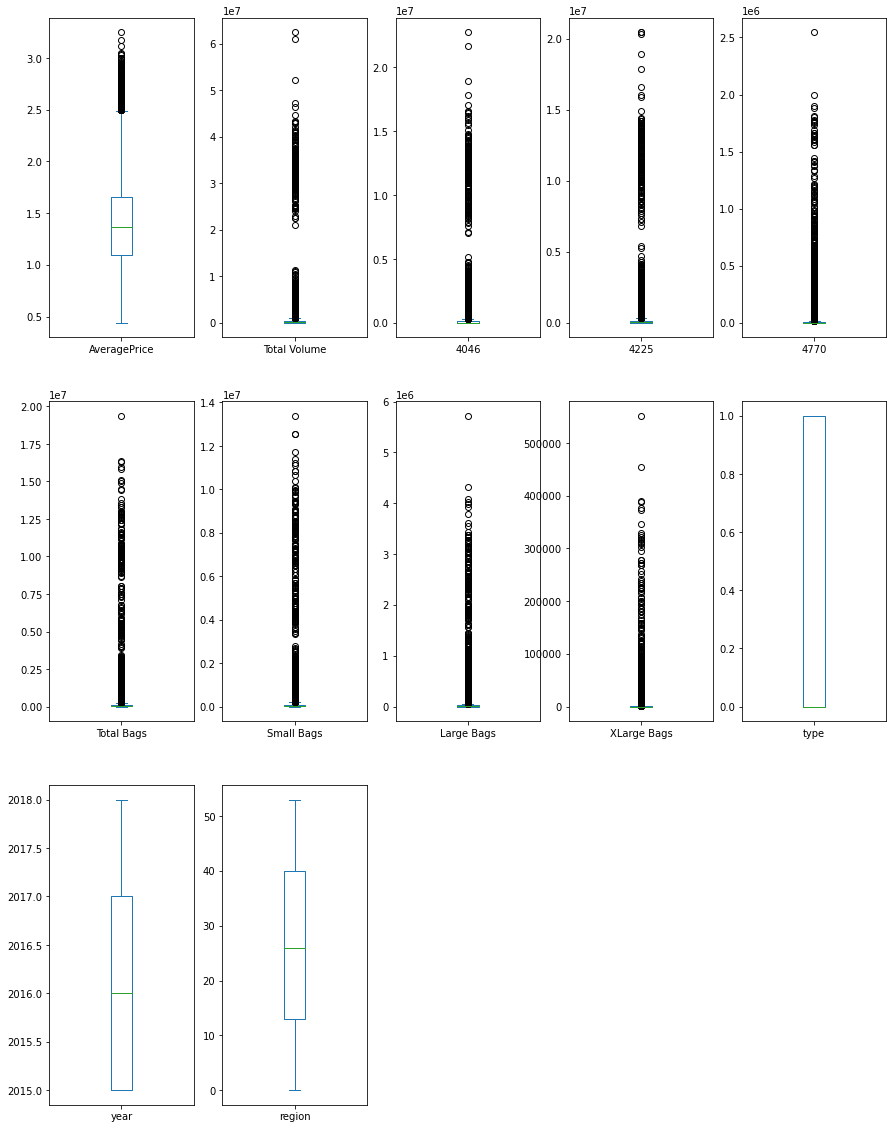

In [36]:
av.plot(kind ='box', subplots =True , layout =(3,5), figsize = (15,20))

Outliers are present in all the data except the year, region and type

Removing Outliers from the data.

Features having outliers

In [37]:
features=av[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(features))
av_new=av[(z<3).all(axis=1)]
av_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


Removed the outliers using zscore method.

Checking the shape of our old data set and new data set.

In [39]:
av.shape

(18249, 12)

In [40]:
av_new.shape

(17782, 12)

Checking data loss 

In [41]:
Dataloss=(((18249-17782)/18249)*100)
Dataloss

2.55904433119623

Data loss through Z score is 2.56%

Lets check the Skewness

In [42]:
av_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

In [43]:
skew_fea=["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]


In [44]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''


"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Removing skewness using yeo-johnson

In [45]:
av_new[skew_fea] = scaler.fit_transform(av_new[skew_fea].values)
av_new["XLarge Bags"]=np.log1p(av_new["XLarge Bags"])


Checking skewness after removing skewness

In [46]:
av_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

Preprocessing Pipeline

Feature Selection

In [47]:
from sklearn.preprocessing import StandardScaler
X =av.drop(columns=['AveragePrice'])
y =av['AveragePrice']
scaler= StandardScaler()

In [48]:
scaled_X = scaler.fit_transform(X)

Selecting Kbest Features

In [49]:
from sklearn.feature_selection import SelectKBest, f_classif

bestfeat = SelectKBest(score_func = f_classif, k = "all")
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(22,'Score'))

         Feature      Score
8           type  53.269112
1           4046   5.015080
0   Total Volume   4.122370
3           4770   4.078789
2           4225   3.508901
4     Total Bags   3.373669
5     Small Bags   3.331022
6     Large Bags   3.269397
9           year   3.056698
7    XLarge Bags   1.746996
10        region   1.334940


Selecting the best features based on scores above


In [50]:
xbest = X.drop(columns=['region','Total Volume','Total Bags' ])
xbest

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015
...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018


In [51]:
xbest_ss = scaler.fit_transform(xbest)

Target column is "region"

In [52]:
collist=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']

av_new[collist]=power_transform(av_new[collist],method='yeo-johnson')
av_new[collist]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.116108,-0.075636,-0.653168,0.348247,-0.211458,-0.534226,-0.345468,-0.789832,-0.689355
1,-0.063731,-0.147608,-0.772216,0.265547,-0.163999,-0.495440,-0.309714,-0.780450,-0.689355
2,-1.300650,0.205534,-0.727091,0.650156,0.035375,-0.562635,-0.372226,-0.768495,-0.689355
3,-0.822900,0.019251,-0.628477,0.466989,-0.109835,-0.706795,-0.507188,-0.712352,-0.689355
4,-0.249571,-0.180657,-0.680097,0.258097,-0.099145,-0.680530,-0.486987,-0.624897,-0.689355
...,...,...,...,...,...,...,...,...,...
18244,0.615242,-0.674146,-0.458796,-0.923266,-1.225582,-0.339795,-0.175213,-0.438299,-0.689355
18245,0.792624,-0.766138,-0.613983,-0.671633,-1.225582,-0.506657,-0.330168,-0.508192,-0.689355
18246,1.128329,-0.770037,-0.613931,-0.778430,0.456238,-0.500600,-0.312125,-0.948869,-0.689355
18247,1.248180,-0.697455,-0.543343,-0.716793,0.455928,-0.432385,-0.249325,-0.916472,-0.689355


In [53]:
x=av_new.drop("AveragePrice",axis=1)
y=av_new["AveragePrice"]

In [54]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.075636,-0.653168,0.348247,-0.211458,-0.534226,-0.345468,-0.789832,-0.689355,0,2015,0
1,-0.147608,-0.772216,0.265547,-0.163999,-0.495440,-0.309714,-0.780450,-0.689355,0,2015,0
2,0.205534,-0.727091,0.650156,0.035375,-0.562635,-0.372226,-0.768495,-0.689355,0,2015,0
3,0.019251,-0.628477,0.466989,-0.109835,-0.706795,-0.507188,-0.712352,-0.689355,0,2015,0
4,-0.180657,-0.680097,0.258097,-0.099145,-0.680530,-0.486987,-0.624897,-0.689355,0,2015,0


In [55]:
y.head()

0   -0.116108
1   -0.063731
2   -1.300650
3   -0.822900
4   -0.249571
Name: AveragePrice, dtype: float64

In [56]:
x.shape, y.shape

((17782, 11), (17782,))

Target Variable is region

In [57]:
x1=av_new.drop("region",axis=1)
y1=av_new["region"]

In [58]:
x1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.116108,-0.075636,-0.653168,0.348247,-0.211458,-0.534226,-0.345468,-0.789832,-0.689355,0,2015
1,-0.063731,-0.147608,-0.772216,0.265547,-0.163999,-0.495440,-0.309714,-0.780450,-0.689355,0,2015
2,-1.300650,0.205534,-0.727091,0.650156,0.035375,-0.562635,-0.372226,-0.768495,-0.689355,0,2015
3,-0.822900,0.019251,-0.628477,0.466989,-0.109835,-0.706795,-0.507188,-0.712352,-0.689355,0,2015
4,-0.249571,-0.180657,-0.680097,0.258097,-0.099145,-0.680530,-0.486987,-0.624897,-0.689355,0,2015


In [59]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int64

In [60]:
x1.shape, y1.shape

((17782, 11), (17782,))

In [61]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [62]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Target Variable is AveragePrice

In [63]:
x.columns[var_threshold.get_support()]

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [64]:
x.shape

(17782, 11)

taking  out  all the  constant  columns

In [65]:
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


Target Variable is region

In [66]:
x1.columns[var_threshold.get_support()]

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year'],
      dtype='object')

In [67]:
x1.shape

(17782, 11)

In [68]:
cons_columns1 = [column for column in x1.columns
               if column not in x1.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.

SelectKBest method

In [69]:
best_fit = SelectKBest(score_func = f_classif, k =11)
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [70]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(11,'Score'))

         Feature      Score
8           type  49.966168
0   Total Volume  39.890559
1           4046  36.646433
4     Total Bags  35.708990
3           4770  27.640618
5     Small Bags  25.029697
6     Large Bags  23.501094
2           4225  21.804561
7    XLarge Bags  15.836752
9           year   3.163539
10        region   1.291093


In [71]:
x=x.drop(["region"],axis=1)

In [72]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.075636,-0.653168,0.348247,-0.211458,-0.534226,-0.345468,-0.789832,-0.689355,0,2015
1,-0.147608,-0.772216,0.265547,-0.163999,-0.495440,-0.309714,-0.780450,-0.689355,0,2015
2,0.205534,-0.727091,0.650156,0.035375,-0.562635,-0.372226,-0.768495,-0.689355,0,2015
3,0.019251,-0.628477,0.466989,-0.109835,-0.706795,-0.507188,-0.712352,-0.689355,0,2015
4,-0.180657,-0.680097,0.258097,-0.099145,-0.680530,-0.486987,-0.624897,-0.689355,0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,-0.674146,-0.458796,-0.923266,-1.225582,-0.339795,-0.175213,-0.438299,-0.689355,1,2018
18245,-0.766138,-0.613983,-0.671633,-1.225582,-0.506657,-0.330168,-0.508192,-0.689355,1,2018
18246,-0.770037,-0.613931,-0.778430,0.456238,-0.500600,-0.312125,-0.948869,-0.689355,1,2018
18247,-0.697455,-0.543343,-0.716793,0.455928,-0.432385,-0.249325,-0.916472,-0.689355,1,2018


Target Variable is region

In [73]:
best_fit1 = SelectKBest(score_func = f_classif, k =11)
fit1 = best_fit1.fit(x1,y1)
dfscores1 = pd.DataFrame(fit.scores_)
dfcolumns1 = pd.DataFrame(x1.columns)

fit1 = best_fit1.fit(x1,y1)
dfscores1 = pd.DataFrame(fit1.scores_)
dfcolumns1 = pd.DataFrame(x1.columns)
dfcolumns1.head()
featureScores1 = pd.concat([dfcolumns1,dfscores1],axis = 1)
featureScores1.columns = ['Feature', 'Score']
print(featureScores1.nlargest(11,'Score'))

         Feature       Score
2           4046  180.123037
7     Large Bags  163.744669
3           4225  143.114344
5     Total Bags  132.666562
6     Small Bags  130.309382
1   Total Volume  118.830650
4           4770   83.831880
0   AveragePrice   71.020556
8    XLarge Bags   26.531360
9           type    4.159580
10          year    0.378935


In [74]:
x1 = x1.drop([ "year"],axis=1)
x1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,-0.116108,-0.075636,-0.653168,0.348247,-0.211458,-0.534226,-0.345468,-0.789832,-0.689355,0
1,-0.063731,-0.147608,-0.772216,0.265547,-0.163999,-0.495440,-0.309714,-0.780450,-0.689355,0
2,-1.300650,0.205534,-0.727091,0.650156,0.035375,-0.562635,-0.372226,-0.768495,-0.689355,0
3,-0.822900,0.019251,-0.628477,0.466989,-0.109835,-0.706795,-0.507188,-0.712352,-0.689355,0
4,-0.249571,-0.180657,-0.680097,0.258097,-0.099145,-0.680530,-0.486987,-0.624897,-0.689355,0
...,...,...,...,...,...,...,...,...,...,...
18244,0.615242,-0.674146,-0.458796,-0.923266,-1.225582,-0.339795,-0.175213,-0.438299,-0.689355,1
18245,0.792624,-0.766138,-0.613983,-0.671633,-1.225582,-0.506657,-0.330168,-0.508192,-0.689355,1
18246,1.128329,-0.770037,-0.613931,-0.778430,0.456238,-0.500600,-0.312125,-0.948869,-0.689355,1
18247,1.248180,-0.697455,-0.543343,-0.716793,0.455928,-0.432385,-0.249325,-0.916472,-0.689355,1


Checking for Multicolinearity

In [75]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,53.524043,Total Volume
1,6.885393,4046
2,11.411086,4225
3,3.780542,4770
4,35.418637,Total Bags
5,17.221166,Small Bags
6,3.582385,Large Bags
7,1.983191,XLarge Bags
8,7.657425,type
9,4.928706,year


The VIF value is more than 10 in the columns 'Total Volume', '4225', 'Total Bags' and 'Small Bags'. But column 'Total Volume' is having highest VIF value. So, we will drop column 'Total Volume'.

In [76]:
x.drop('Total Volume', axis =1, inplace=True)

Checking again Multicolinearity using VIF

In [77]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,3.440148,4046
1,4.203405,4225
2,3.770516,4770
3,25.282642,Total Bags
4,17.219308,Small Bags
5,3.534106,Large Bags
6,1.968791,XLarge Bags
7,7.157829,type
8,4.672405,year


Here we can see that Multicolinearity is still present in the columns. So, we will again drop highest VIF value column which is 'Total Bags' for removing Multicolinearity.

In [78]:
x.drop('Total Bags', axis =1, inplace=True)

Checking again Multicolinearity using VIF

In [79]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,3.433743,4046
1,4.088223,4225
2,3.766205,4770
3,3.611151,Small Bags
4,1.777785,Large Bags
5,1.968174,XLarge Bags
6,7.153151,type
7,4.669999,year


Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.

Creating Model
Finding the best random state among all the models
for Regression model

In [80]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.845208186161424 on random_state: 72


At random state 72, we are getting best accuracy score i.e., 83%

Creating train-test-split

For regression model

In [81]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [82]:
x.shape, y.shape


((17782, 8), (17782,))

In [83]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((12447, 8), (12447,), (5335, 8), (5335,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided.

We have to check this dataset through both model building, regression and classification. First, we are using regression model then classification.

Linear Regression

In [89]:
lr=LinearRegression()
lr.fit(x_train,y_train)
#prediction
pred_lr=lr.predict(x_test)

#checking R2 Score
print("R2 score: ", r2_score(y_test, pred_lr))
#checking Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_lr))
#checking Mean squared error
print("Mean squared error: ",mean_squared_error(y_test,pred_lr))
#checking Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score:  0.4736795991344702
Mean abs error:  0.5676303018253717
Mean squared error:  0.5278670500208751
Root Mean Squared Error:  0.7265445960303297


Checking the performance of the model by graph

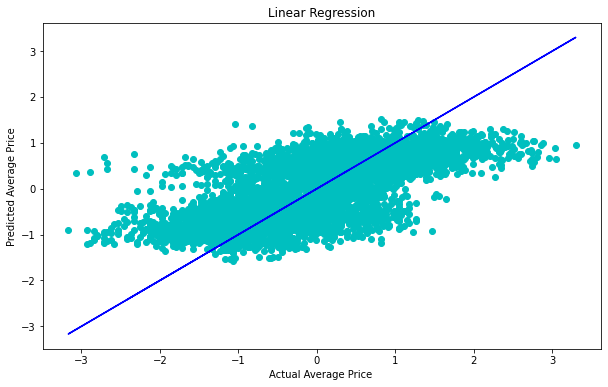

In [90]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_lr,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("Linear Regression")
plt.show()

Random forest Regression Model

In [91]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)
# prediction
pred_RFR=RFR.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_RFR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_RFR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_RFR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8346819220128872
Mean abs error:  0.2916126120471936
Mean squared error:  0.1658038829554584
Root Mean Squared Error:  0.4071902294449836


R2 score for Random forest Regression is 82%

Checking the performance of the model by graph

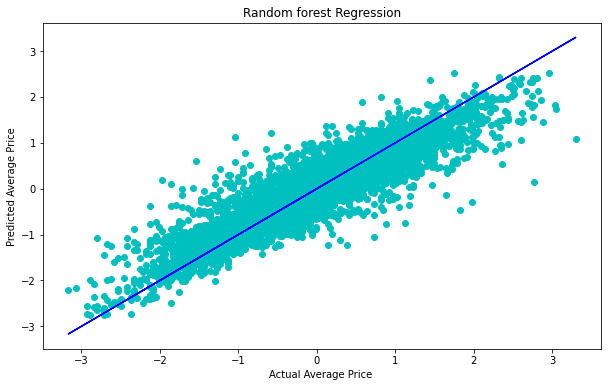

In [92]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_RFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("Random forest Regression")
plt.show()

KNN regressor

In [93]:
# Checking R2 score for KNN Regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)
# prediction
pred_knn=knn.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_knn))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))


R2 score:  0.7868305913819118
Mean abs error:  0.3344000796325274
Mean squared error:  0.2137958298725986
Root Mean Squared Error:  0.4623806114799783


R2 score for KNN regressor is 77%

Checking the performance of the model by graph

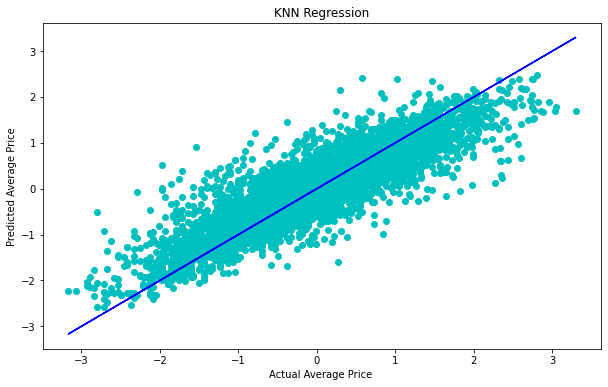

In [94]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_knn,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("KNN Regression")
plt.show()

Gradient Boosting Regressor

In [95]:
# Checking R2 score for Gradient Boosting Regressor 
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=29, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)
# prediction
pred_Gb=Gb.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_Gb))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_Gb))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_Gb))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_Gb)))

R2 score:  0.7275178474441505
Mean abs error:  0.39522875111636036
Mean squared error:  0.27328287069332646
Root Mean Squared Error:  0.5227646417780438


R2 score for Gradient Boosting Regressor is 71%

Checking the performance of the model by graph

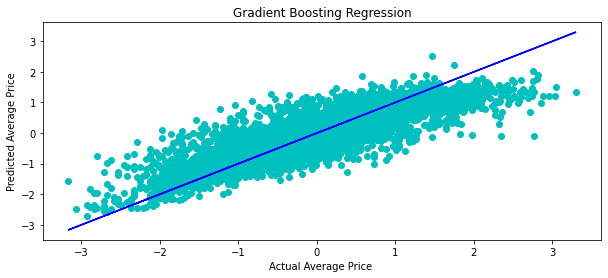

In [96]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,4))
plt.scatter(x=y_test,y=pred_Gb,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("Gradient Boosting Regression")
plt.show()

Ridge Regressor

In [97]:
paramRidge = {'alpha':[0.01,0.1,1.0,10.26],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'solver': 'sag'}


In [98]:
# Checking R2 score for Ridge Regressor
ridge=Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
# prediction
pred_ridge=ridge.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_ridge))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_ridge))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_ridge))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 score:  0.47373919291860667
Mean abs error:  0.56760435849063
Mean squared error:  0.5278072811139888
Root Mean Squared Error:  0.7265034625615964


Checking the performance of the model by graph

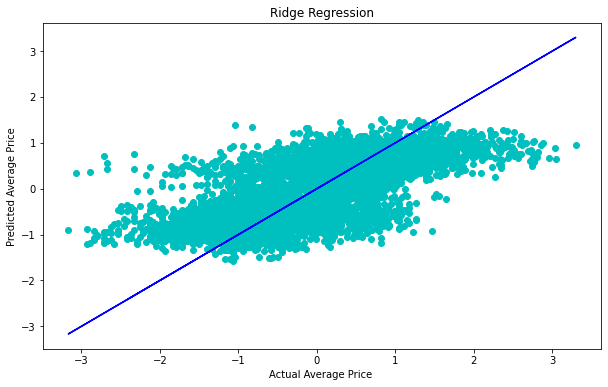

In [99]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_ridge,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("Ridge Regression")
plt.show()

Checking Cross Validation Score of Models
Checking CV score for Linear Regression

In [100]:
print('The CV score  for Linear_regression is :',cross_val_score(lr,x,y,cv=5).mean())

The CV score  for Linear_regression is : 0.08538298135014533


Checking CV score for Random Forest Regression

In [101]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=5).mean())

The CV  score for  the Random forest regressor is: 0.30608067207241463


Checking CV score for KNN Regression

In [102]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=5).mean())

The CV score  for  the KNN regressor is : 0.08891142248260031


Checking CV score for Ridge Regression

Hyper Parameter Tuning

The Random Forest Regressor with GridsearchCV

In [103]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],
             'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [104]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

Creating Final Regressor Model

In [105]:
Best_model_Regressor = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)
Best_model_Regressor.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=20, min_samples_leaf=5,
                      min_samples_split=10, n_estimators=60)

In [106]:
#prediction
pred = Best_model_Regressor.predict(x_test)
#Accuracy score
acc = r2_score(y_test,pred_RFR)
print(acc*100)

83.46819220128872


So, after the Hypertuning now we got a accuracy score of 83% on Random Forest Regression

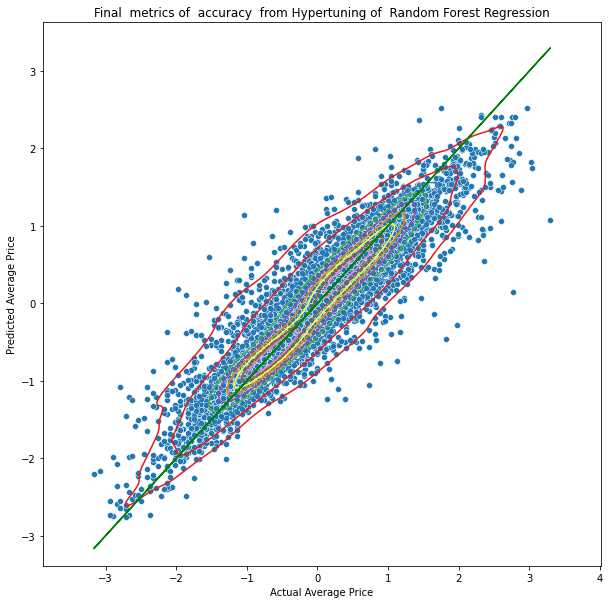

In [107]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=pred_RFR,palette='Set2')
sns.kdeplot(x=y_test,y=pred_RFR, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Average Price")
plt.ylabel("Predicted Average Price")
plt.title("Final  metrics of  accuracy  from Hypertuning of  Random Forest Regression")
plt.show()

Saving The Predictive Regressor Model

In [108]:
#saving the model at local file system
filename='Avacado_Regressor_Project.pickle'
pickle.dump(Best_model_Regressor,open(filename,'wb'))
#prediction using the saved model
loaded_model_r = pickle.load(open(filename, 'rb'))
loaded_model_r.predict(x_test)

array([-0.58587315, -0.69400894, -0.07899503, ...,  0.51467253,
        0.51107204, -2.24013974])

In [109]:
# Adjusted R2 score
lr.score(x_train,y_train)

0.4808159311555965

Let's check how well model fits the test data

In [110]:
lr.score(x_test,y_test)

0.4736795991344702

Prediction of Regressor Model

In [111]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_model_Regressor.predict(x_test))
Avacado_Regressor = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Avacado_Regressor

,Original,Predicted
0,0.407361,-0.585873
1,-0.822900,-0.694009
2,-0.614600,-0.078995
3,0.189966,0.692207
4,1.991909,2.059810
...,...,...
5330,0.523977,1.084693
5331,1.046657,0.777789
5332,-0.063731,0.514673
5333,0.770815,0.511072


Let's plot and visualize

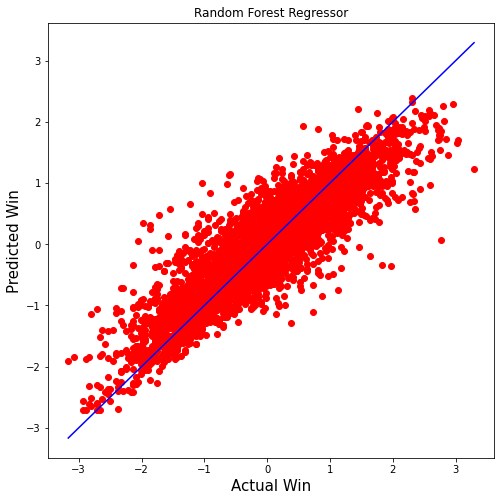

In [112]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predicted,c='r')
plt1 = max(max(predicted),max(y_test))
plt2 = min(min(predicted),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Win',fontsize=15)
plt.ylabel('Predicted Win',fontsize=15)
plt.title("Random Forest Regressor")
plt.show()


Classification Model Building

For Target Column region
Finding the best random state among all the models

In [113]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7928772258669166  on Random_state  6


At random state 4, Best accuracy is 79%

Creating train-test-split

In [114]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [115]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((12447, 10), (12447,), (5335, 10), (5335,))

In [116]:
x.shape, y.shape

((17782, 8), (17782,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. As it is a continuous data , so we have to understand this by Classification problem

Decision Tree Classifier

In [117]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.7911902530459232
confusion_matrix: 
 [[85  0  0 ...  0  0  0]
 [ 0 82  0 ...  0  0  1]
 [ 0  0 94 ...  0  0  2]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  1  2 ...  0  0 60]]
classification_report: 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       113
           1       0.77      0.74      0.75       111
           2       0.93      0.90      0.91       105
           3       0.72      0.78      0.75        74
           4       0.86      0.84      0.85       101
           5       0.72      0.70      0.71        97
           6       0.96      0.94      0.95        78
           7       0.85      0.82      0.84       124
           8       0.95      0.85      0.89        84
           9       0.86      0.87      0.86        99
          10       0.74      0.68      0.71       106
          11       0.89      0.84      0.86       102
          12       0.82      0.77      0.79        98
      

Accuracy Score for Decision Tree Classifier is 79%

Random Forest Classifier

In [118]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.8909090909090909
confusion_matrix: 
 [[ 94   0   0 ...   0   0   0]
 [  0  97   0 ...   0   0   1]
 [  0   0 101 ...   0   0   0]
 ...
 [  0   0   0 ...  47   0   0]
 [  0   0   0 ...   0  77   0]
 [  0   2   4 ...   0   0  81]]
classification_report: 
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       113
           1       0.87      0.87      0.87       111
           2       0.93      0.96      0.94       105
           3       0.82      0.88      0.85        74
           4       0.94      0.92      0.93       101
           5       0.78      0.81      0.80        97
           6       0.97      0.99      0.98        78
           7       0.92      0.94      0.93       124
           8       0.99      0.96      0.98        84
           9       0.85      0.83      0.84        99
          10       0.87      0.92      0.89       106
          11       0.93      0.94      0.94       102
          12       0.97 

Accuracy Score for Random Forest Classifier is 89%

Support Vector Machine Classifier

In [119]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print(accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test,pred_svc))

0.6822867853795689
[[81  0  0 ...  0  0  0]
 [ 0 59  0 ...  0  0  3]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  5  2 ...  0  0 44]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       113
           1       0.37      0.53      0.44       111
           2       0.86      0.88      0.87       105
           3       0.63      0.70      0.67        74
           4       0.65      0.80      0.72       101
           5       0.56      0.60      0.58        97
           6       0.89      0.96      0.93        78
           7       0.64      0.66      0.65       124
           8       0.90      0.90      0.90        84
           9       0.77      0.81      0.79        99
          10       0.60      0.68      0.63       106
          11       0.62      0.91      0.74       102
          12       0.70      0.70      0.70        98
          13       0.56      0.64      0.60       104
          14  

Accuracy Score for Support Vector Machine Classifier is 68%

KNN Classifier

In [120]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test,pred_knn))

0.8423617619493908
[[106   0   0 ...   0   0   0]
 [  0  90   0 ...   0   0   0]
 [  0   0 101 ...   0   0   0]
 ...
 [  0   0   0 ...  47   0   0]
 [  0   0   0 ...   0  74   0]
 [  0   1   3 ...   0   0  75]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       113
           1       0.78      0.81      0.80       111
           2       0.94      0.96      0.95       105
           3       0.78      0.76      0.77        74
           4       0.84      0.86      0.85       101
           5       0.79      0.79      0.79        97
           6       0.99      0.97      0.98        78
           7       0.81      0.88      0.84       124
           8       0.93      0.98      0.95        84
           9       0.76      0.79      0.78        99
          10       0.67      0.80      0.73       106
          11       0.81      0.93      0.87       102
          12       0.90      0.91      0.90        98
          13       0.77      0.7

Accuracy Score for KNN Classifier is 84%

Cross Validation Score for all the model

CV Score for Decision Tree Classifier

In [121]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x1,y1,cv=5).mean())

CV score for Decision Tree Classifier:  0.5429616121572096


CV Score for Random Forest Classifier

In [122]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x1,y1,cv=9).mean())

CV score for Random forest Classifier:  0.7499091204154494


CV Score for KNN Classifier

Hyper parameter tuning for best model using GridsearchCV

from sklearn.metrics import precision_score, recall_score, make_scorer

In [123]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = .30, random_state = 42)

In [124]:
rfc=RandomForestClassifier(random_state=42)

In [125]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
ava_region = RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
ava_region.fit(x_train, y_train)
pred = ava_region.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

In [ ]:
# calculating the scores 
score = cross_val_score(rfc,x1,y1,cv=100,scoring="accuracy").mean()
print("Cross Validation Score: ", score*100)
print("Mean Score :", score.mean()*100)
print("STD Score:", score.std())

In [ ]:
ROC-AUC Curve

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label=True)

In [ ]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label = "ROC Curve (area= %0.2f)" % acc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Characteristic")
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the model has the area under curve as 0.72.

Accuracy Score is 71%, Cross Validation Score: 87.79730844918429, Mean Score : 87.79730844918429 and STD Score: 0.0

Saving the Classification Model

In [ ]:
filename='Avacado_region.pickle'
pickle.dump(CV_rfc,open(filename,'wb'))
loaded_model2 = pickle.load(open(filename, 'rb'))
loaded_model2.predict(x_test)

Checking predicted and original values

In [ ]:
a =np.array(y_test)
predicted=np.array(CV_rfc.predict(x_test))
Avacado_regions=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Avacado_regions

Using Target Variable "AveragePrice", we get Accuracy score 82% and
Using Target Variable "region", we get Accuracy score 71%
On the basis of Target Variable "AveragePrice" is giving better accuracy compare to Target Variable "region"
 